In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score,confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [3]:
def get_correlation(X_test, y_test,models):
    #This function calculates the average correlation between predictors  
    n_estimators=len(models.estimators_)
    prediction=np.zeros((y_test.shape[0],n_estimators))
    predictions=pd.DataFrame({'estimator '+str(n+1):[] for n in range(n_estimators)})
    
    for key,model in zip(predictions.keys(),models.estimators_):
        predictions[key]=model.predict(X_test.to_numpy())
    
    corr=predictions.corr()
    print("Average correlation between predictors: ", corr.mean().mean()-1/n_estimators)
    return corr

In [4]:
df = pd.read_csv('cirrhosis.csv')
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [5]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [6]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [7]:
df.dropna(subset=['Drug'],inplace=True)
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [8]:
df.isna().sum()

ID                0
N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [9]:
for i in df.columns[df.isna().any()].tolist():
    df[i] = df[i].fillna(df[i].mean())
df.isna().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [10]:
df.drop(columns=['ID'],inplace=True)
catcolumns=df.select_dtypes(include=['object']).columns.tolist()
intcolumns=df.select_dtypes(include=['float64','int64']).columns.tolist()

In [11]:
encoder=LabelEncoder()
for i in catcolumns:
    df[i]=encoder.fit_transform(df[i])
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [12]:
skf=StratifiedKFold(n_splits=10)
scaler=StandardScaler()
X=df.drop(columns=['Status'])
y=df['Status']

X[intcolumns]=scaler.fit_transform(X[intcolumns])

model=DecisionTreeClassifier()
accuracy=[]
precision=[]
for train_index, test_index in skf.split(X,y):
    train_x,test_x= X.loc[train_index],X.loc[test_index]
    train_y,test_y= y.loc[train_index],y.loc[test_index]
    model.fit(train_x,train_y)
    prediction=model.predict(test_x)

    accuracy.append(accuracy_score(test_y,prediction))
    precision.append(precision_score(test_y,prediction,average='weighted'))
print(f'max accuracy: {max(accuracy)}')
print(f'max precision: {max(precision)}')

max accuracy: 0.78125
max precision: 0.8047619047619048


C:\Users\lenov\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenov\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [14]:
n_estimators=20
Bag= BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 4,random_state=2),n_estimators=n_estimators,random_state=0,bootstrap=True)
Bag.fit(X_train,y_train)

C:\Users\lenov\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4,
                                                        random_state=2),
                  n_estimators=20, random_state=0)

In [15]:
print(get_accuracy(X_train, X_test, y_train, y_test,  Bag))

{'test Accuracy': 0.8076923076923077, 'train Accuracy': 0.8675213675213675}


In [16]:
get_correlation(X_test, y_test,Bag).style.background_gradient(cmap='coolwarm')

Average correlation between predictors:  0.5348617047224518


,estimator 1,estimator 2,estimator 3,estimator 4,estimator 5,estimator 6,estimator 7,estimator 8,estimator 9,estimator 10,estimator 11,estimator 12,estimator 13,estimator 14,estimator 15,estimator 16,estimator 17,estimator 18,estimator 19,estimator 20
estimator 1,1.000000,0.600698,0.616749,0.584613,0.541929,0.702885,0.731401,0.502973,0.574366,0.708021,0.541713,0.609230,0.614176,0.515912,0.652451,0.783802,0.573165,0.654480,0.703676,0.675013
estimator 2,0.600698,1.000000,0.780904,0.504030,0.592069,0.598889,0.652711,0.607876,0.668060,0.535544,0.470004,0.437995,0.581091,0.427450,0.513591,0.661624,0.390825,0.641217,0.747979,0.531479
estimator 3,0.616749,0.780904,1.000000,0.405758,0.492722,0.474948,0.567681,0.511902,0.534180,0.562447,0.558446,0.593669,0.562084,0.477923,0.539392,0.691826,0.409967,0.533943,0.750761,0.435101
estimator 4,0.584613,0.504030,0.405758,1.000000,0.464405,0.564034,0.677672,0.365509,0.452394,0.464405,0.457643,0.302193,0.406148,0.550994,0.497764,0.573035,0.513469,0.564569,0.406201,0.527229
estimator 5,0.541929,0.592069,0.492722,0.464405,1.000000,0.644380,0.765424,0.440874,0.559127,0.563433,0.540438,0.472053,0.542181,0.598409,0.735717,0.667164,0.633369,0.833193,0.547558,0.774871
estimator 6,0.702885,0.598889,0.474948,0.564034,0.644380,1.000000,0.686808,0.422485,0.613627,0.706013,0.524384,0.440620,0.520817,0.478316,0.647520,0.646817,0.415285,0.619972,0.546342,0.612669
estimator 7,0.731401,0.652711,0.567681,0.677672,0.765424,0.686808,1.000000,0.661009,0.681040,0.626580,0.569143,0.544191,0.600577,0.612280,0.707418,0.726874,0.634158,0.877430,0.615526,0.767483
estimator 8,0.502973,0.607876,0.511902,0.365509,0.440874,0.422485,0.661009,1.000000,0.594736,0.440874,0.467261,0.519831,0.522242,0.391829,0.451529,0.535516,0.365361,0.606514,0.558830,0.467685
estimator 9,0.574366,0.668060,0.534180,0.452394,0.559127,0.613627,0.681040,0.594736,1.000000,0.529916,0.443289,0.334056,0.556043,0.369386,0.480181,0.570473,0.328672,0.588752,0.536311,0.476670
estimator 10,0.708021,0.535544,0.562447,0.464405,0.563433,0.706013,0.626580,0.440874,0.529916,1.000000,0.568299,0.559859,0.700841,0.397960,0.596160,0.681700,0.479073,0.525453,0.666941,0.479974


In [17]:
n_estimators=20
M_features=X.shape[1]
max_features=round(np.sqrt(M_features))-1
max_features

3

In [18]:
model = RandomForestClassifier( max_features=max_features,n_estimators=n_estimators, random_state=0)

In [19]:
model.fit(X_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=20, random_state=0)

In [20]:
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.7948717948717948, 'train Accuracy': 1.0}


In [21]:
get_correlation(X_test, y_test,model).style.background_gradient(cmap='coolwarm')

Average correlation between predictors:  0.35944135643810887


,estimator 1,estimator 2,estimator 3,estimator 4,estimator 5,estimator 6,estimator 7,estimator 8,estimator 9,estimator 10,estimator 11,estimator 12,estimator 13,estimator 14,estimator 15,estimator 16,estimator 17,estimator 18,estimator 19,estimator 20
estimator 1,1.000000,0.330550,0.497439,0.438303,0.309394,0.085792,0.428885,0.400663,0.395854,0.463673,0.308430,0.278813,0.286336,0.490405,0.024165,0.349832,0.517994,0.113279,0.250721,0.401021
estimator 2,0.330550,1.000000,0.659995,0.445947,0.490756,0.283926,0.487430,0.607297,0.345522,0.635727,0.555627,0.579334,0.539392,0.602536,0.311441,0.512522,0.448766,0.432768,0.493820,0.589852
estimator 3,0.497439,0.659995,1.000000,0.405002,0.455640,0.331692,0.594981,0.610491,0.383698,0.503918,0.525224,0.485839,0.440319,0.414416,0.165295,0.353241,0.556003,0.377083,0.519532,0.486883
estimator 4,0.438303,0.445947,0.405002,1.000000,0.342620,0.136514,0.220056,0.468018,0.234765,0.361240,0.310288,0.364427,0.245621,0.424132,0.383014,0.492459,0.367917,0.152258,0.411062,0.382880
estimator 5,0.309394,0.490756,0.455640,0.342620,1.000000,0.368165,0.297400,0.460098,0.481119,0.493197,0.427138,0.465731,0.297710,0.471155,0.303543,0.320037,0.304865,0.460357,0.582836,0.414368
estimator 6,0.085792,0.283926,0.331692,0.136514,0.368165,1.000000,0.124513,0.208321,0.312663,0.262652,0.104453,0.272764,0.078427,0.271948,0.223452,0.178926,0.132120,0.248079,0.305271,0.401856
estimator 7,0.428885,0.487430,0.594981,0.220056,0.297400,0.124513,1.000000,0.499480,0.476204,0.397435,0.493376,0.586438,0.502256,0.399519,0.055984,0.335495,0.524279,0.252767,0.419321,0.368455
estimator 8,0.400663,0.607297,0.610491,0.468018,0.460098,0.208321,0.499480,1.000000,0.457443,0.493882,0.629038,0.523996,0.328006,0.480705,0.242355,0.476614,0.383567,0.246751,0.469399,0.391891
estimator 9,0.395854,0.345522,0.383698,0.234765,0.481119,0.312663,0.476204,0.457443,1.000000,0.516447,0.383272,0.292157,0.321918,0.431602,0.198318,0.301873,0.344537,0.255321,0.497333,0.356764
estimator 10,0.463673,0.635727,0.503918,0.361240,0.493197,0.262652,0.397435,0.493882,0.516447,1.000000,0.363186,0.486463,0.411568,0.590043,0.102577,0.521944,0.435508,0.218769,0.345878,0.518104


In [22]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}

In [23]:
model = RandomForestClassifier()

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy', cv=3)
search.fit(X_train, y_train)

C:\Users\lenov\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
600 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lenov\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lenov\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\lenov\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 638, in _validate_params
    val

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [26]:
search.best_score_

0.7649572649572649

In [27]:
search.best_params_

{'max_depth': 3, 'max_features': 'log2', 'n_estimators': 35}

In [28]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.7948717948717948, 'train Accuracy': 0.8076923076923077}


In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        42
           1       0.00      0.00      0.00         2
           2       0.83      0.59      0.69        34

    accuracy                           0.76        78
   macro avg       0.53      0.51      0.51        78
weighted avg       0.77      0.76      0.75        78

Accuracy score:  0.76


Text(0.5, 102.72222222222219, 'Ground Truth')

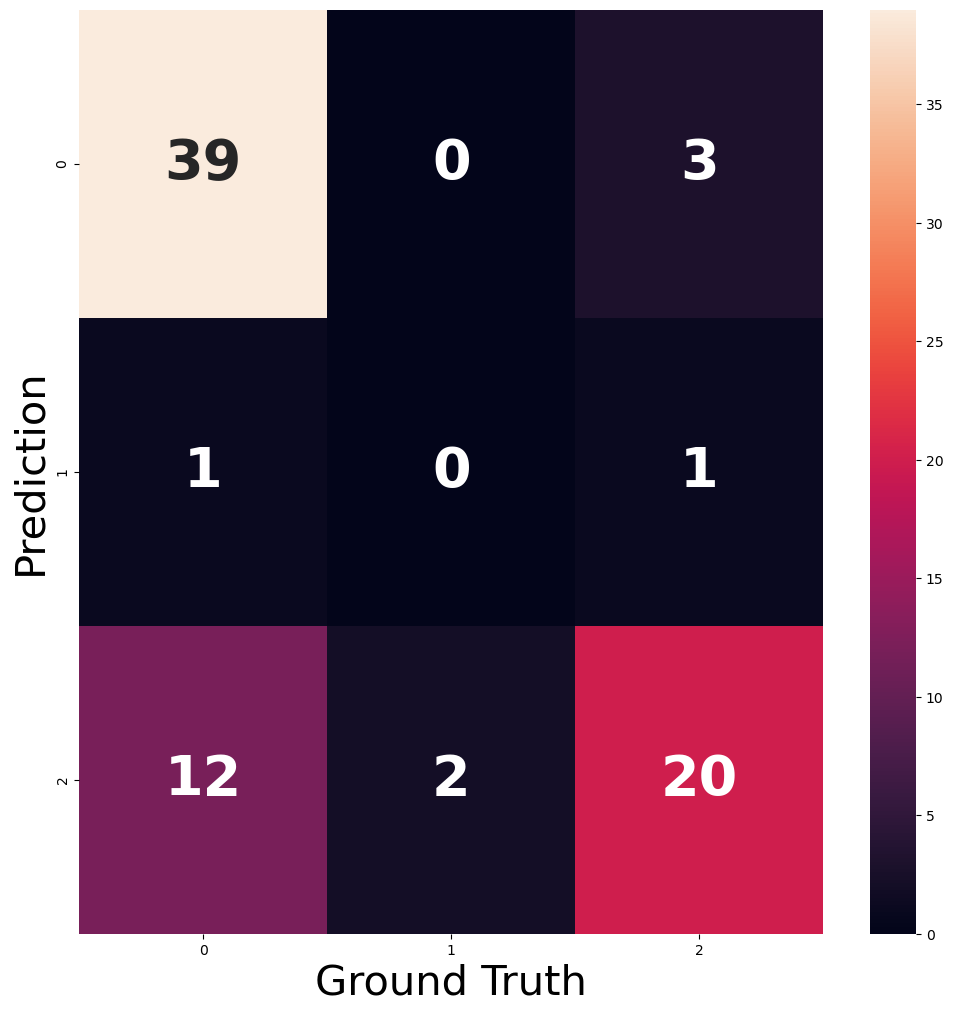

In [30]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

In [31]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,0,0,22347,0,0,1,0,0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,994,0,1,21294,0,0,0,0,0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,939,0,0,22767,0,0,0,0,0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,839,0,0,13879,0,0,0,0,0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [32]:
df.describe()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,2006.362179,0.862179,0.493590,18269.442308,0.115385,0.076923,0.512821,0.288462,0.221154,3.256090,369.510563,3.520000,97.648387,1982.655769,122.556346,124.702128,261.935065,10.725641,3.032051
std,1123.280843,0.960764,0.500762,3864.805407,0.319999,0.266897,0.500639,0.453775,0.549014,4.530315,221.257085,0.419892,85.338190,2140.388824,56.699525,61.926753,94.991905,1.004323,0.877880
min,41.000000,0.000000,0.000000,9598.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1191.000000,0.000000,0.000000,15427.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,255.750000,3.310000,41.750000,871.500000,80.600000,87.000000,200.000000,10.000000,2.000000
50%,1839.500000,0.000000,0.000000,18187.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.350000,322.000000,3.550000,73.000000,1259.000000,114.700000,114.000000,258.500000,10.600000,3.000000
75%,2697.250000,2.000000,1.000000,20715.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.425000,392.250000,3.800000,123.000000,1980.000000,151.900000,145.250000,322.000000,11.100000,4.000000
max,4556.000000,2.000000,1.000000,28650.000000,1.000000,1.000000,1.000000,1.000000,2.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


In [33]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [34]:
continuous_features = df.select_dtypes(['float64', 'int64']).columns
unique_counts = df.nunique()
continuous_features = unique_counts[unique_counts > 10].index

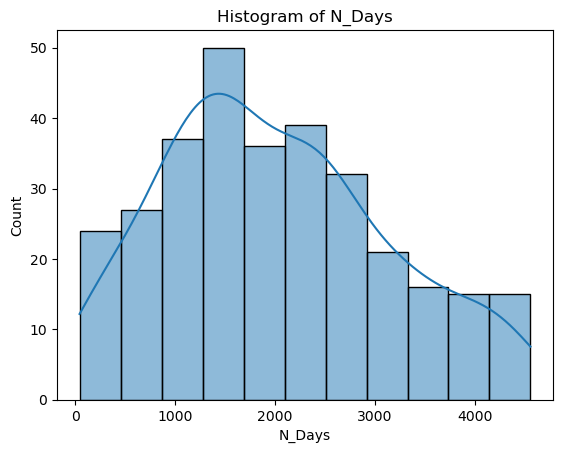

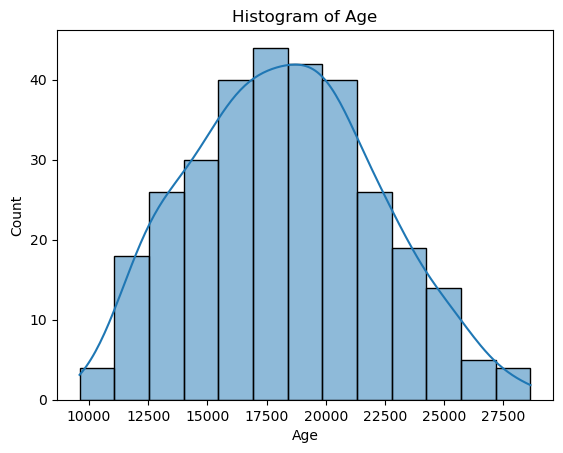

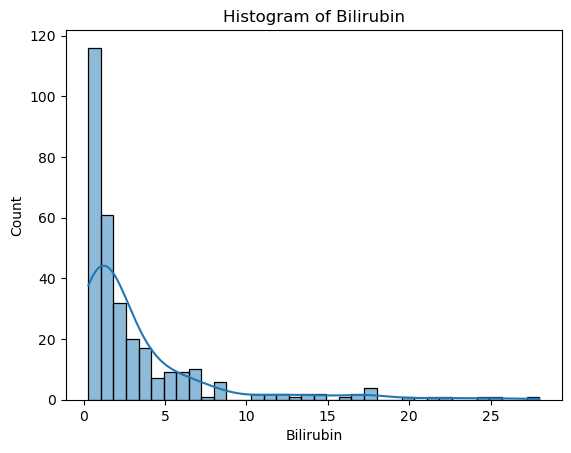

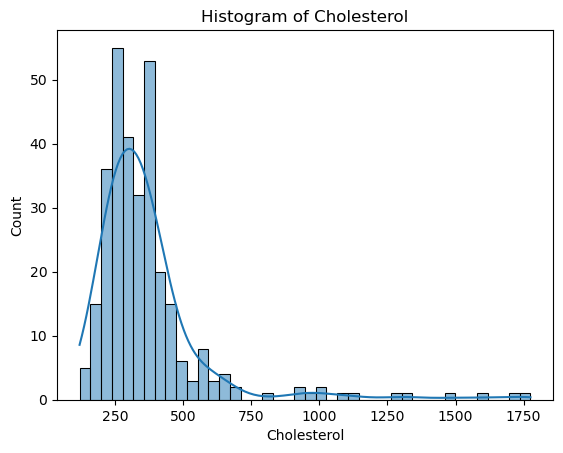

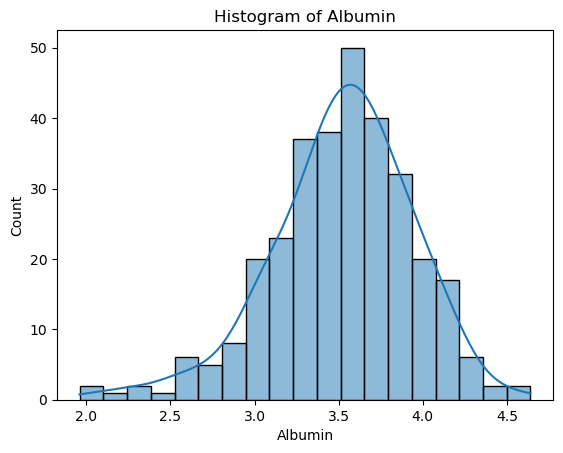

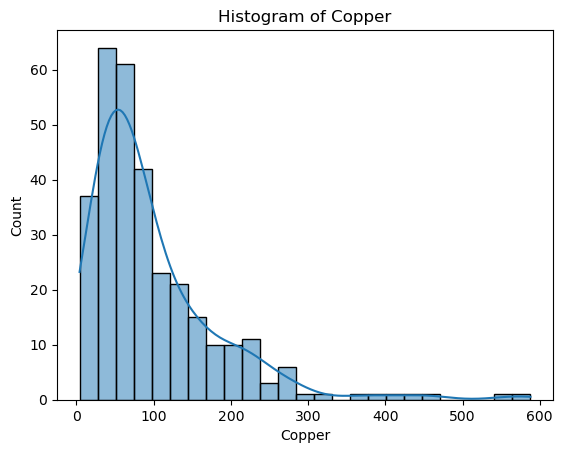

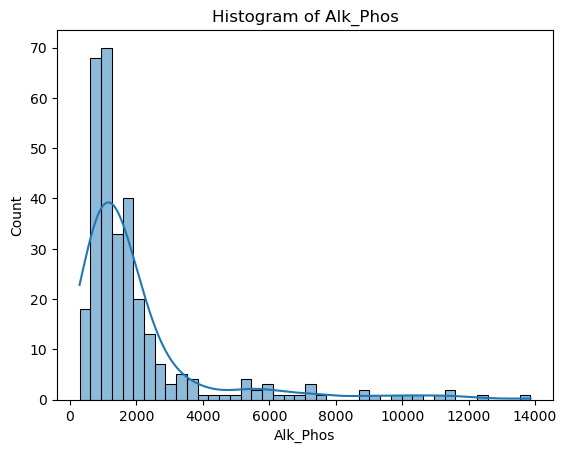

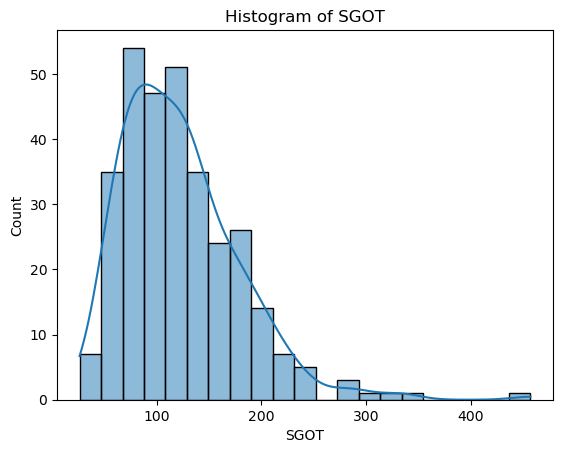

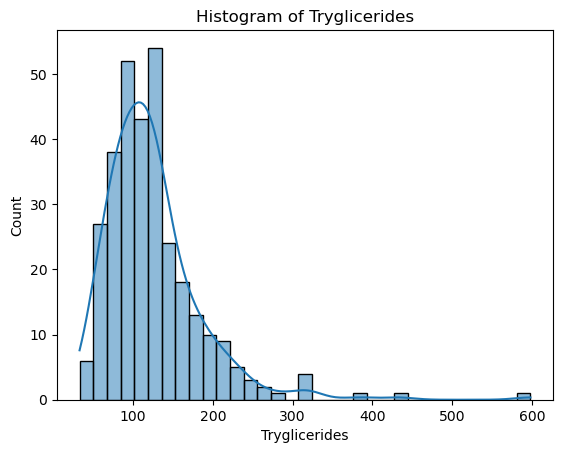

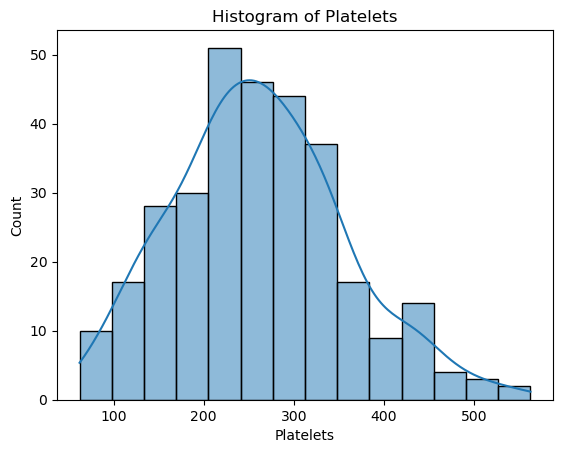

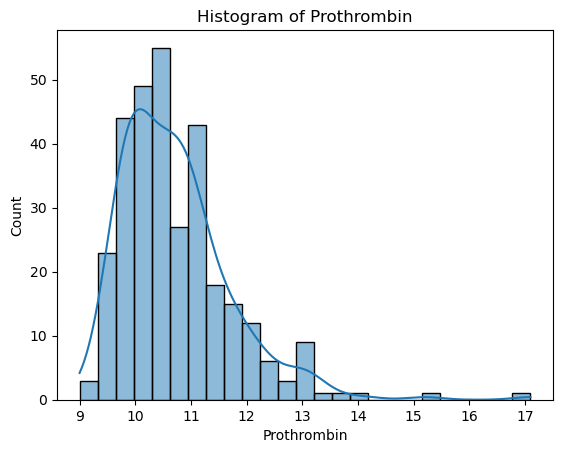

In [35]:
for feature in continuous_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

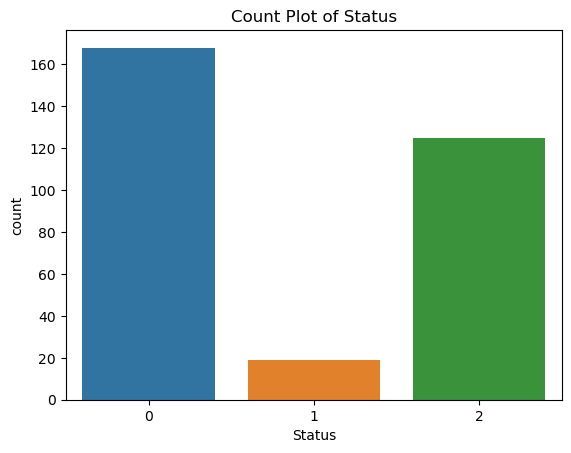

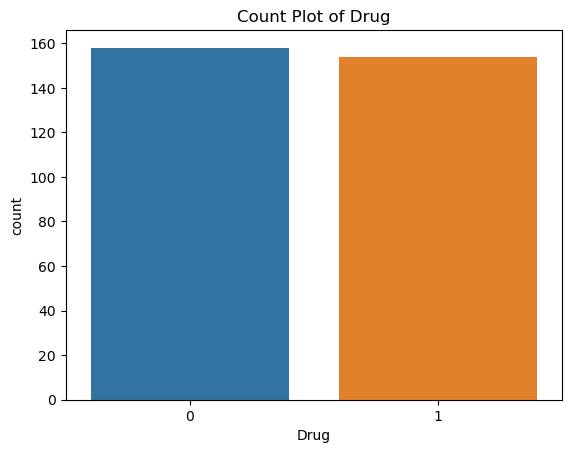

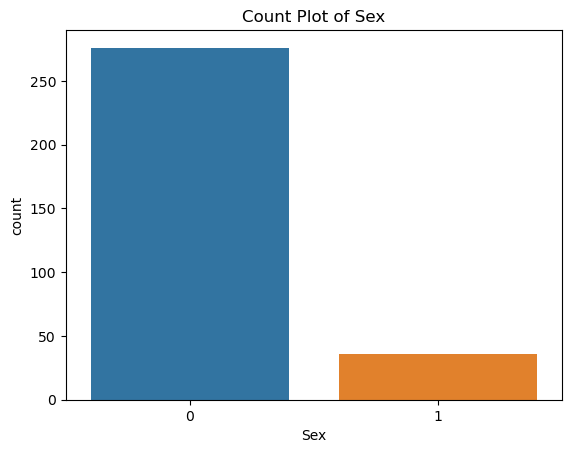

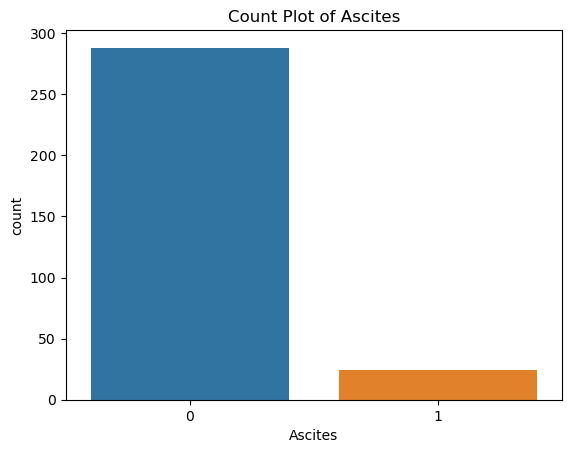

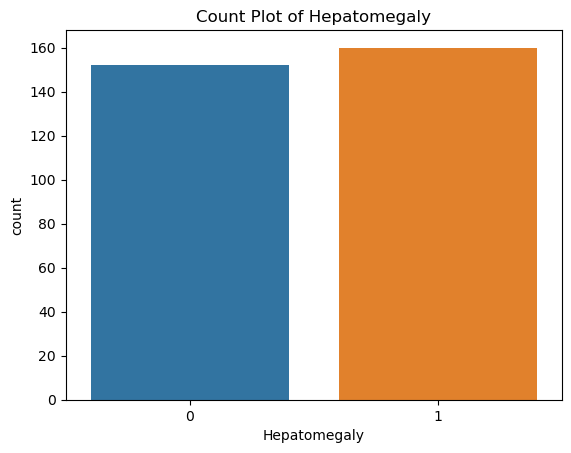

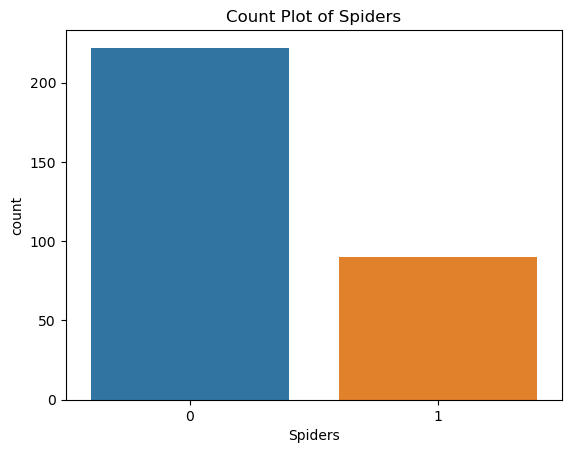

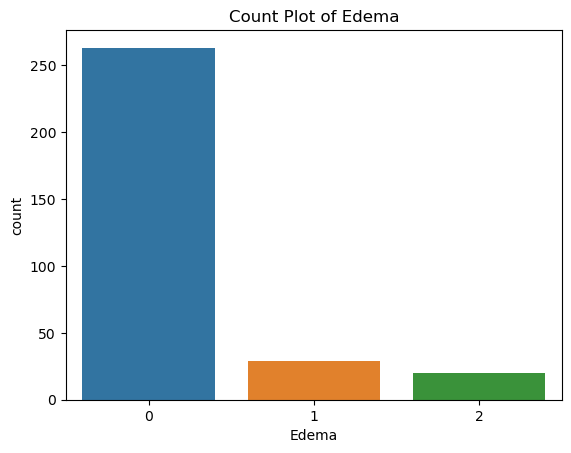

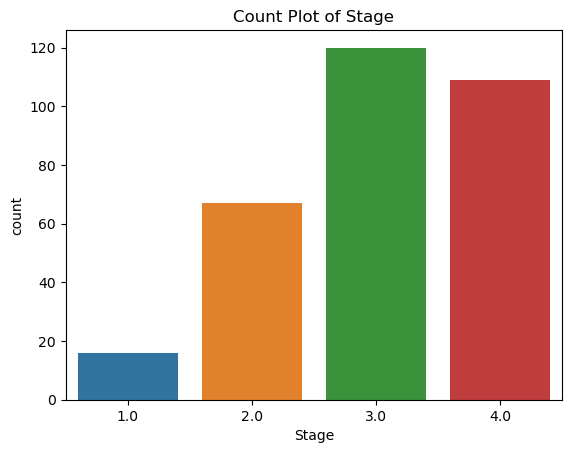

In [36]:
categorical_features = df.select_dtypes(['object', 'category']).columns
unique_counts = df.nunique()
categorical_features = unique_counts[unique_counts <= 10].index
for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.title(f'Count Plot of {feature}')
    plt.show()

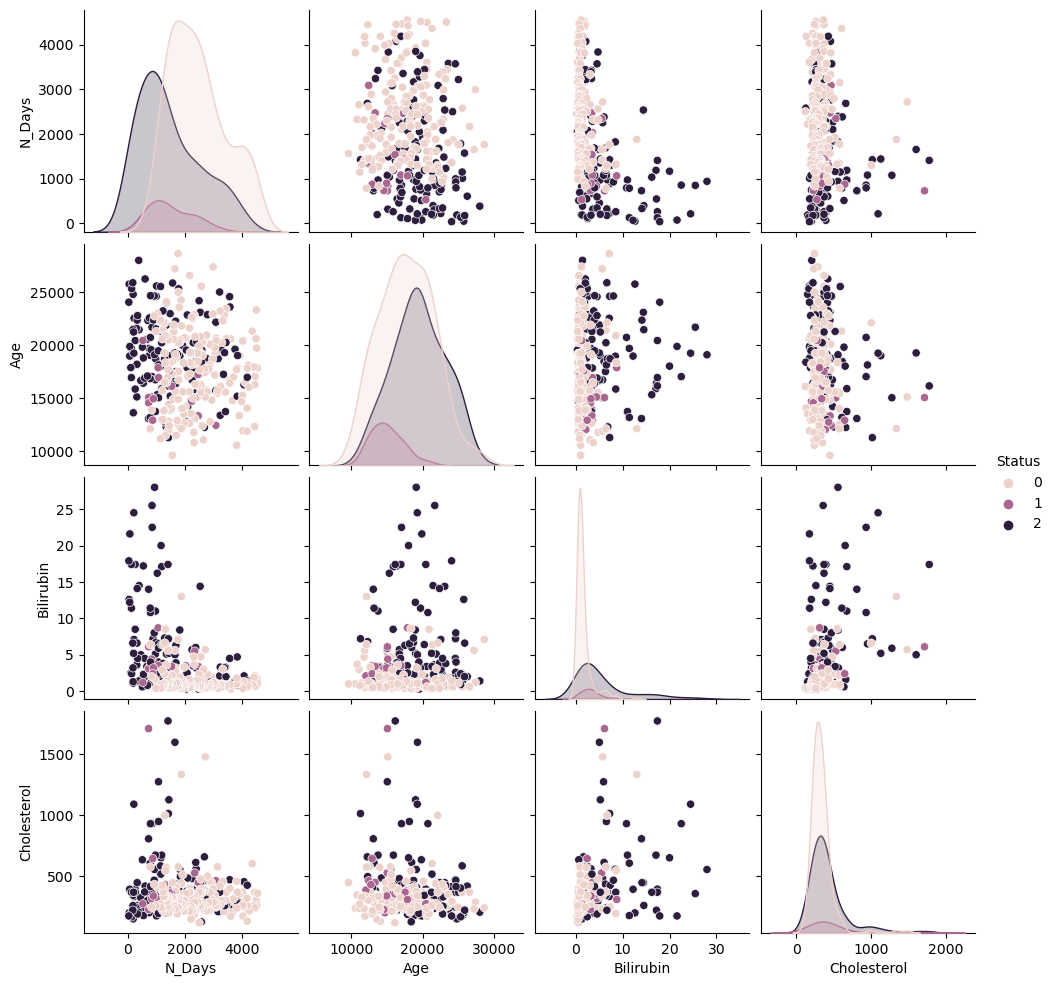

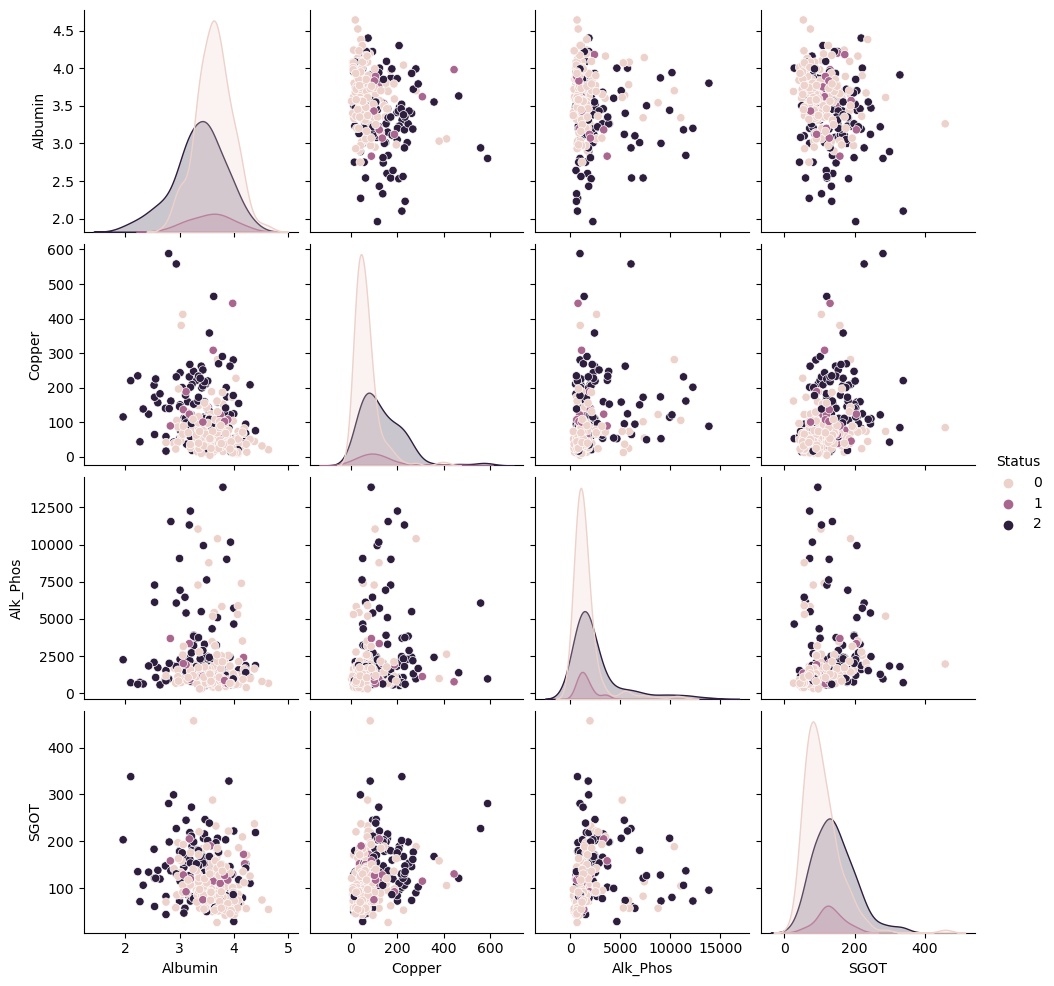

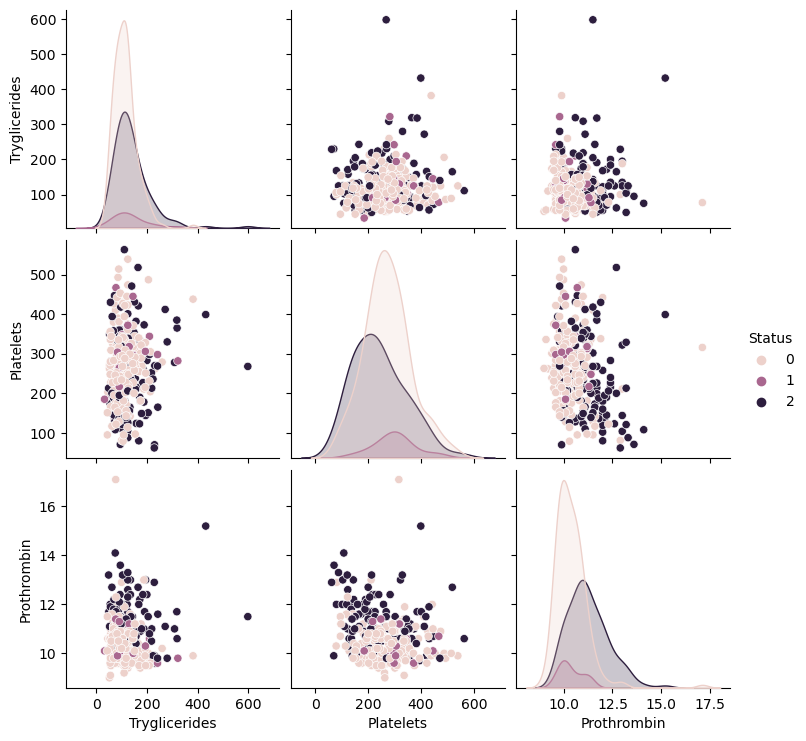

In [37]:
continuous_features

pair1 = df[['N_Days', 'Age', 'Bilirubin', 'Cholesterol','Status']]
pair2 = df[[ 'Albumin', 'Copper','Alk_Phos', 'SGOT','Status']]
pair3 = df[['Tryglicerides', 'Platelets', 'Prothrombin','Status']]

sns.pairplot(data=pair1,hue='Status')
sns.pairplot(data=pair2,hue='Status')
sns.pairplot(data=pair3,hue='Status')

In [172]:
continuous_features

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object')

In [171]:
categorical_features

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
       'Stage'],
      dtype='object')

<Axes: >

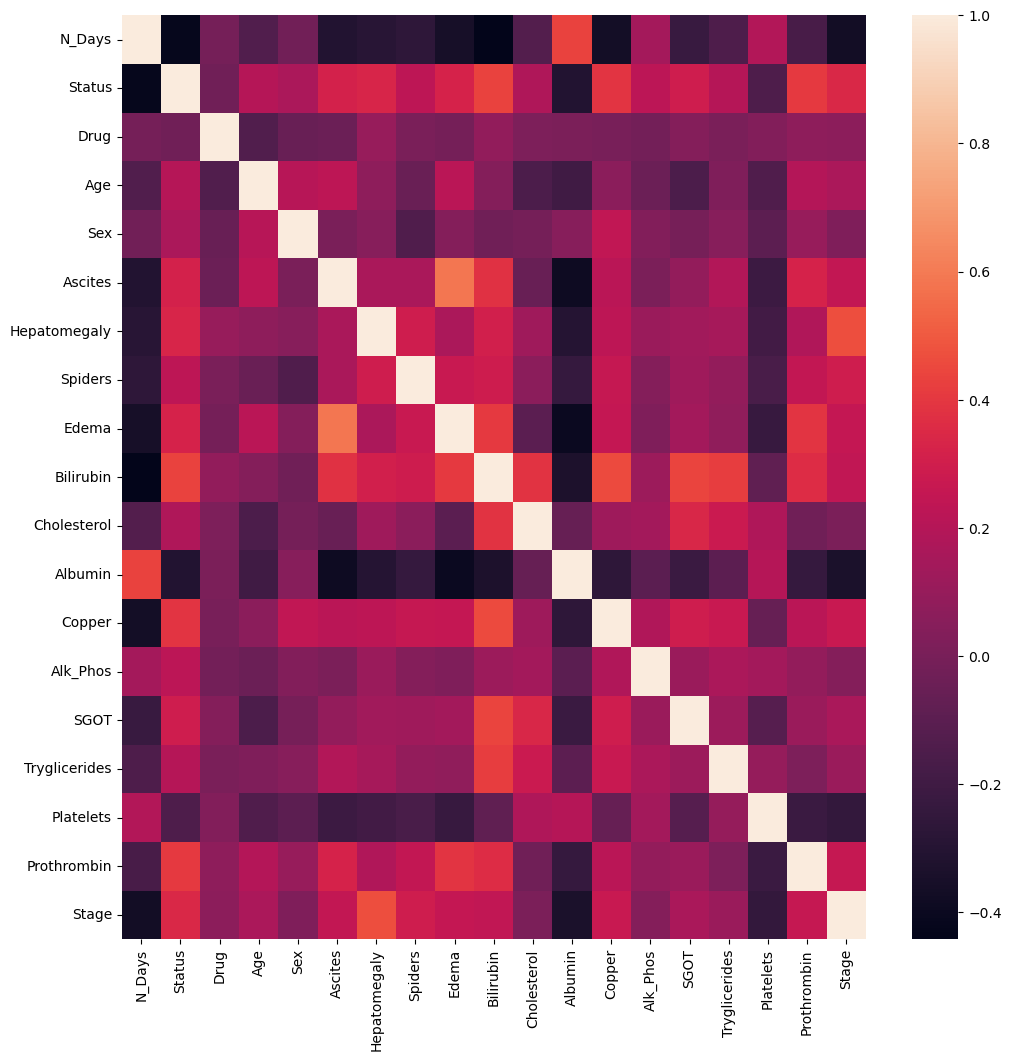

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [39]:
df['Age'] = df['Age'].apply(lambda x: round(x/365.25))
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,2,0,59,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,0,0,56,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,2,0,70,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,2,0,55,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,1,1,38,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,0,0,61,0,0,1,0,0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,994,0,1,58,0,0,0,0,0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,939,0,0,62,0,0,0,0,0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,839,0,0,38,0,0,0,0,0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [40]:
df_copy = df

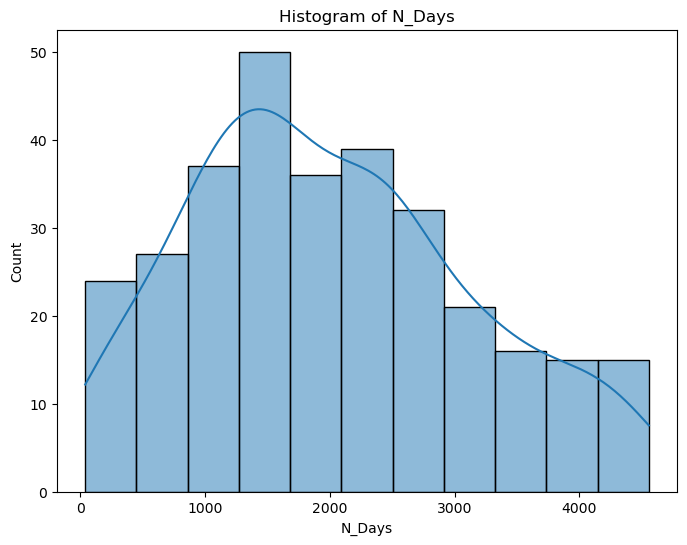

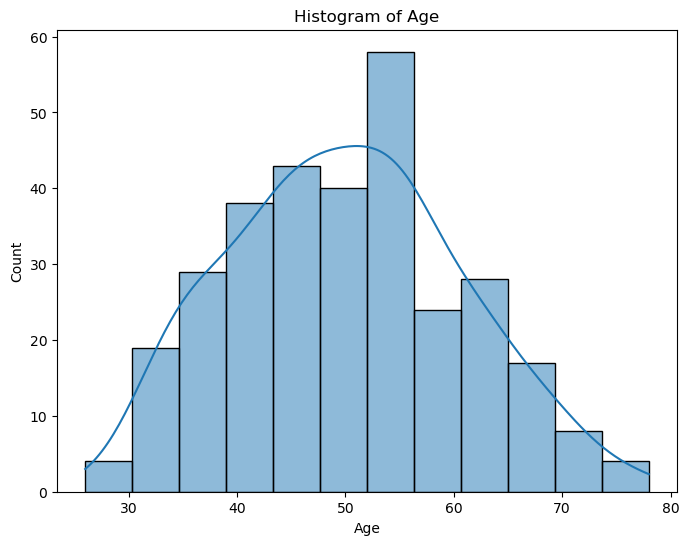

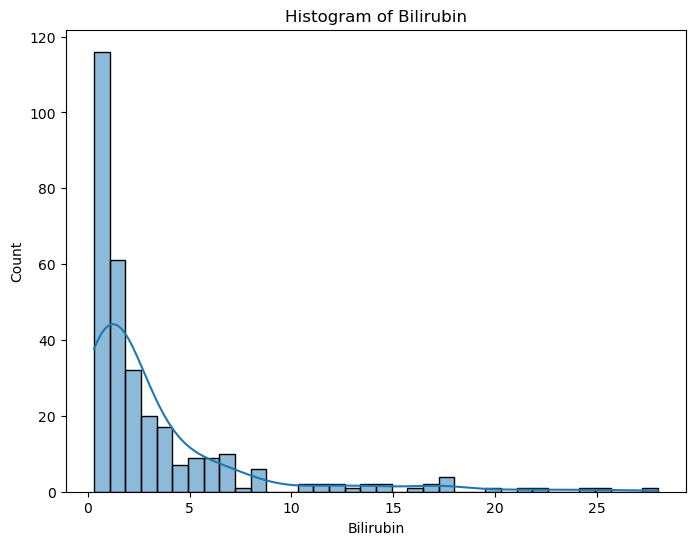

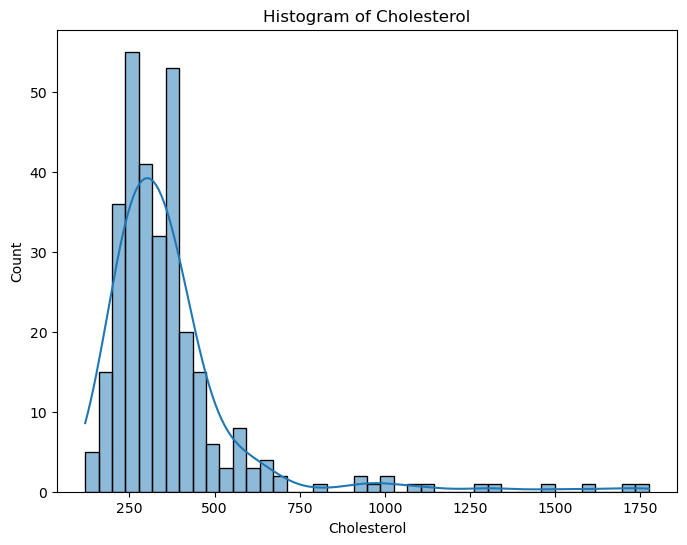

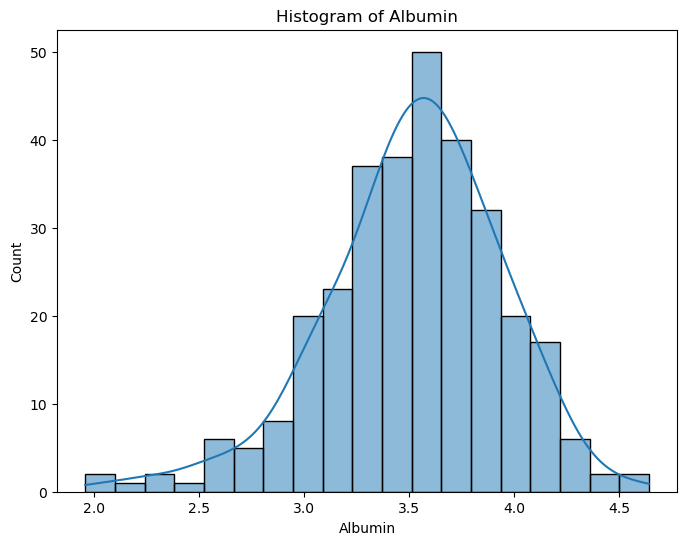

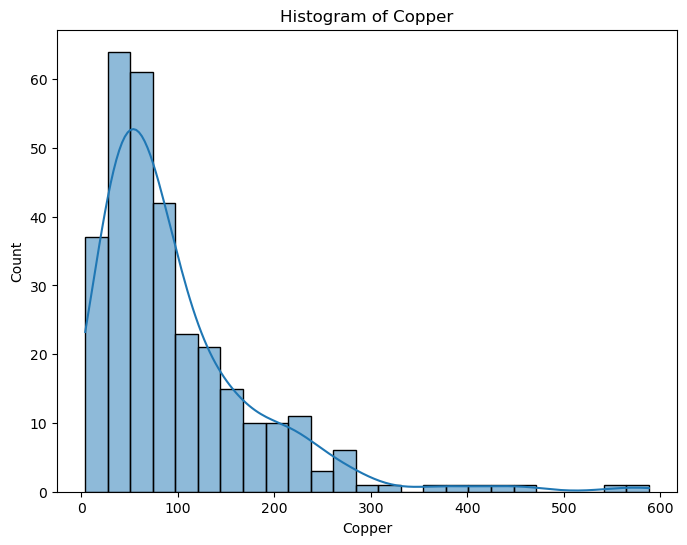

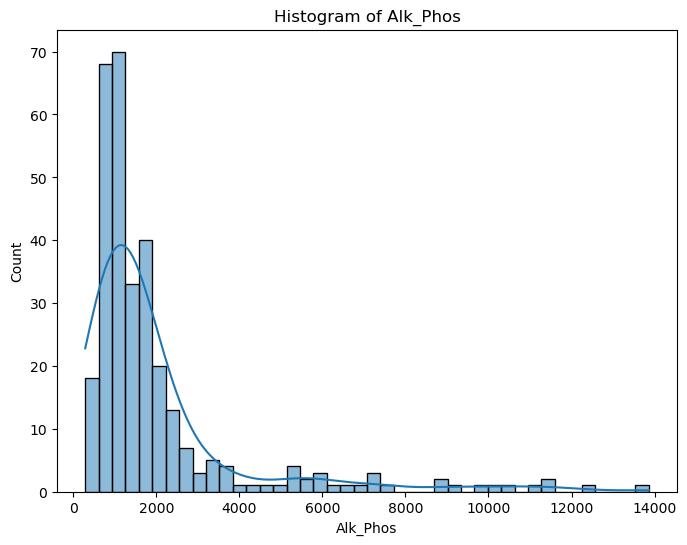

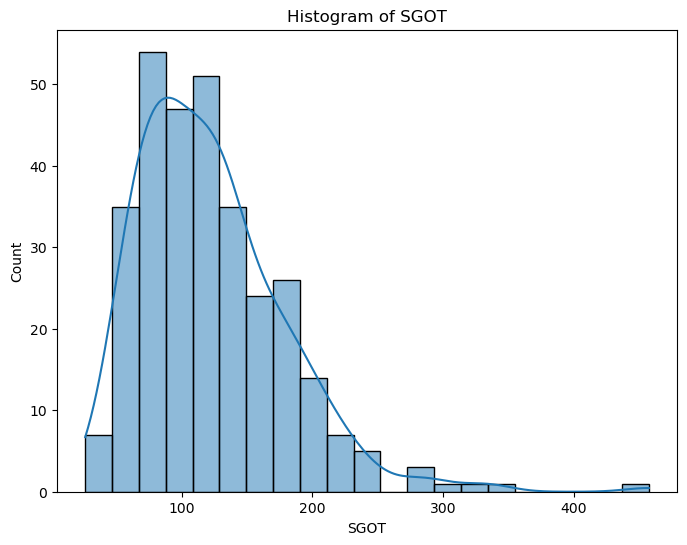

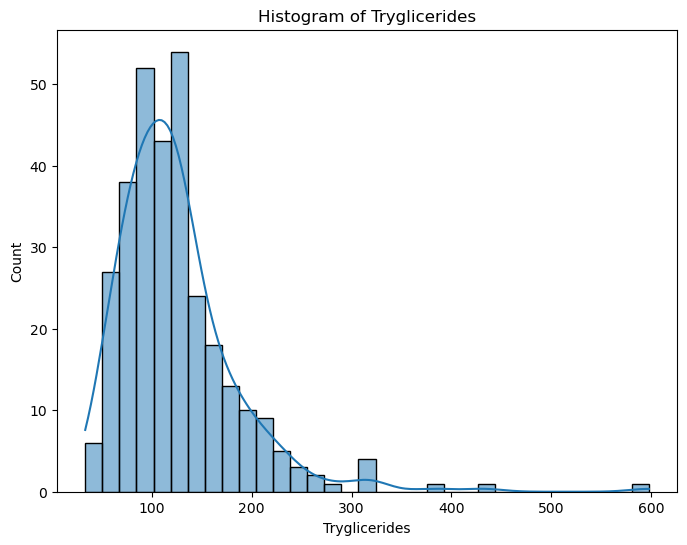

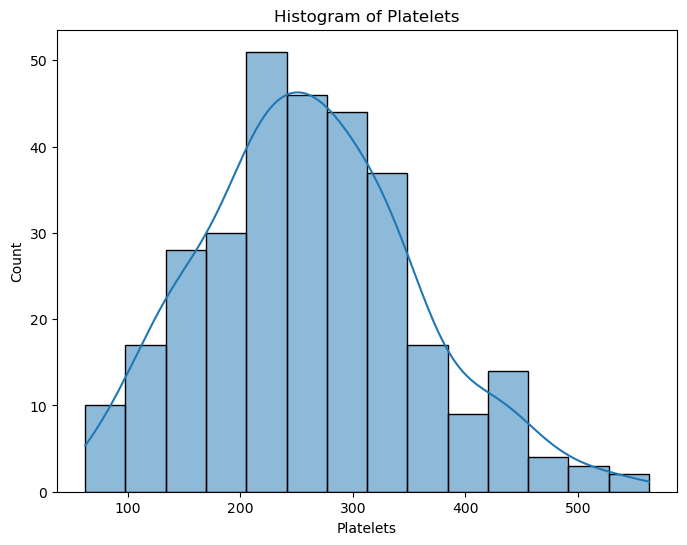

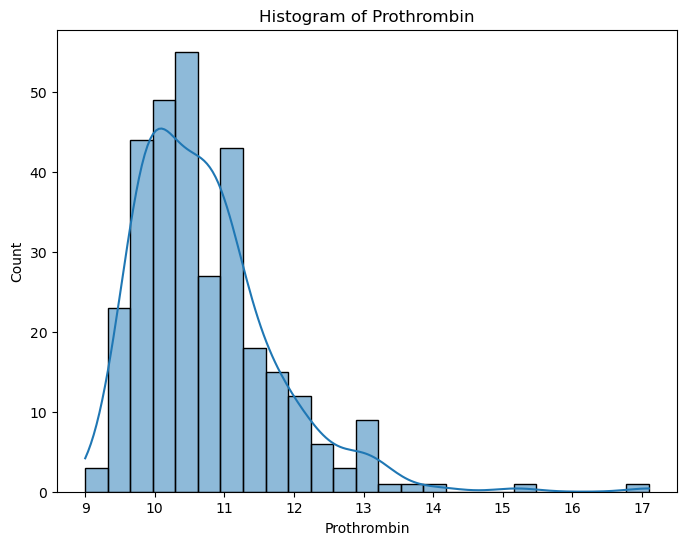

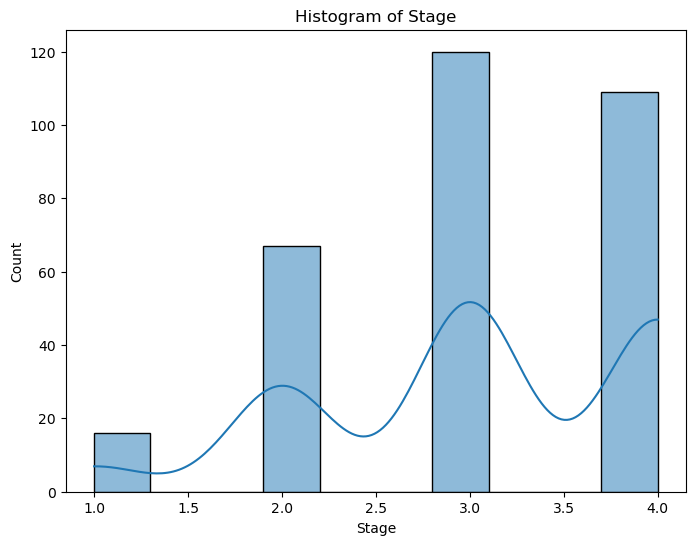

In [41]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

### Skewed Features = [Bilirubin, Prothrombin, Tryglicerides, SGOT, ALK_Phos, Copper, Cholestrol]

Text(0.5, 1.0, 'unskewed')

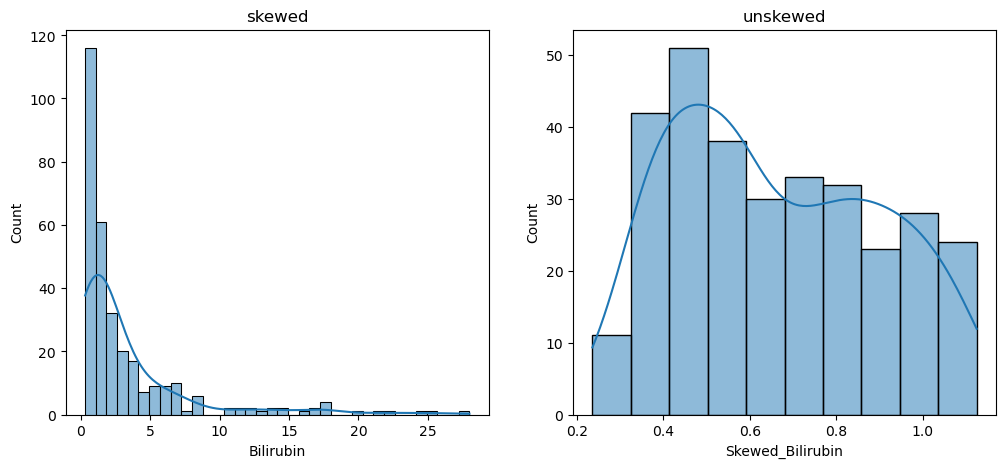

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
from scipy.stats import boxcox

sns.histplot(df['Bilirubin'], kde=True, ax=axes[0])
axes[0].set_title('skewed')

df['Skewed_Bilirubin'],_ = boxcox(df['Bilirubin'] + 1)

sns.histplot(df['Skewed_Bilirubin'], kde=True, ax=axes[1])
axes[1].set_title('unskewed')

In [43]:
skewed_features = ['Bilirubin', 'Prothrombin', 'Tryglicerides', 'SGOT', 'Alk_Phos', 'Copper', 'Cholesterol']

Text(0.5, 1.0, 'Histogram of log')

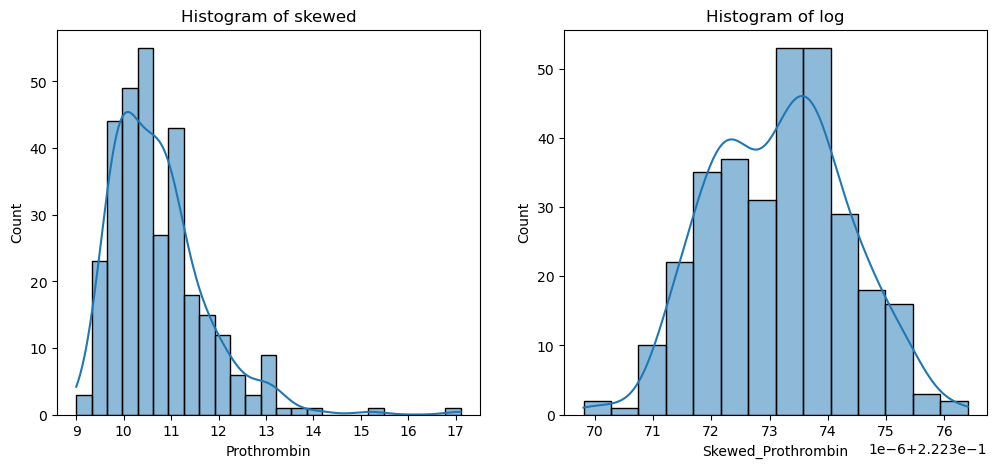

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
from scipy.stats import boxcox

sns.histplot(df['Prothrombin'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of skewed')

df['Skewed_Prothrombin'],_ = boxcox(df['Prothrombin'] + 1)

sns.histplot(df['Skewed_Prothrombin'], kde=True, ax=axes[1])
axes[1].set_title('Histogram of log')

Text(0.5, 1.0, 'Histogram of log')

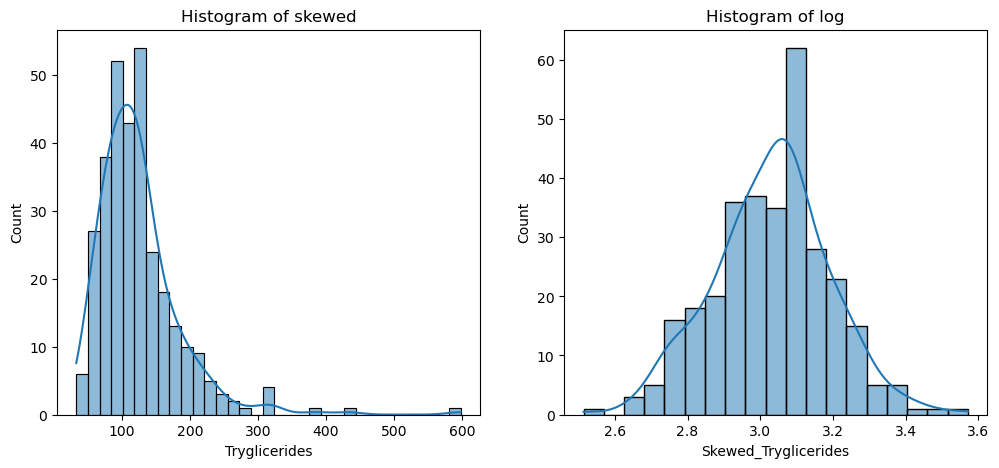

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
from scipy.stats import boxcox

sns.histplot(df['Tryglicerides'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of skewed')

df['Skewed_Tryglicerides'],_ = boxcox(df['Tryglicerides'] + 1)

sns.histplot(df['Skewed_Tryglicerides'], kde=True, ax=axes[1])
axes[1].set_title('Histogram of log')

Text(0.5, 1.0, 'Histogram of log')

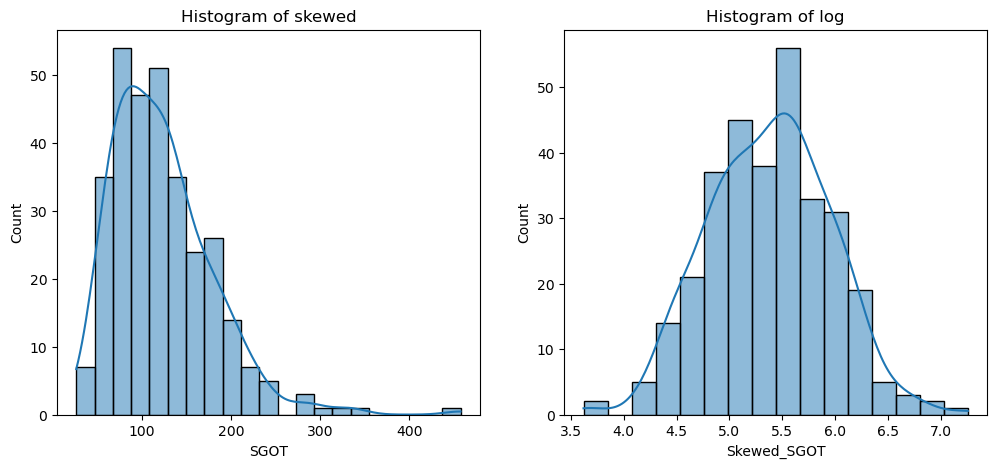

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['SGOT'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of skewed')

df['Skewed_SGOT'],_ = boxcox(df['SGOT'] + 1)

sns.histplot(df['Skewed_SGOT'], kde=True, ax=axes[1])
axes[1].set_title('Histogram of log')

Text(0.5, 1.0, 'Histogram of log')

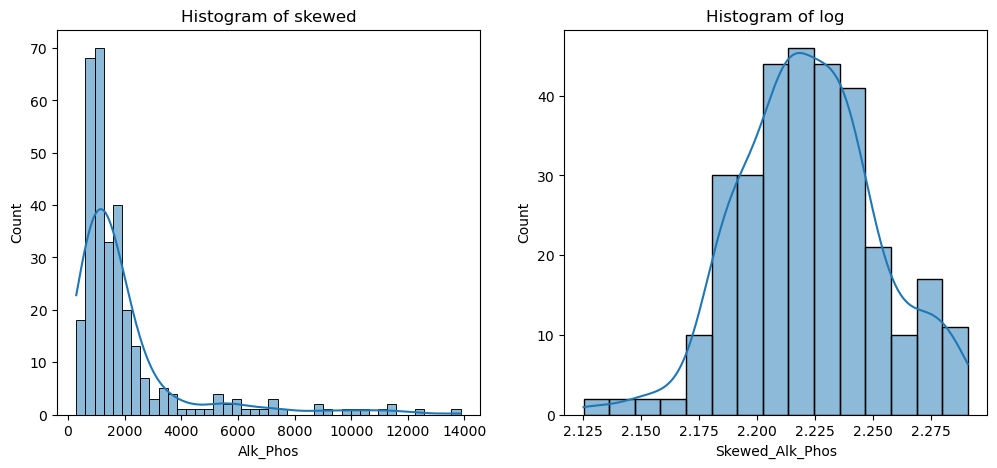

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Alk_Phos'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of skewed')

df['Skewed_Alk_Phos'],_ = boxcox(df['Alk_Phos'] + 1)

sns.histplot(df['Skewed_Alk_Phos'], kde=True, ax=axes[1])
axes[1].set_title('Histogram of log')

Text(0.5, 1.0, 'Histogram of log')

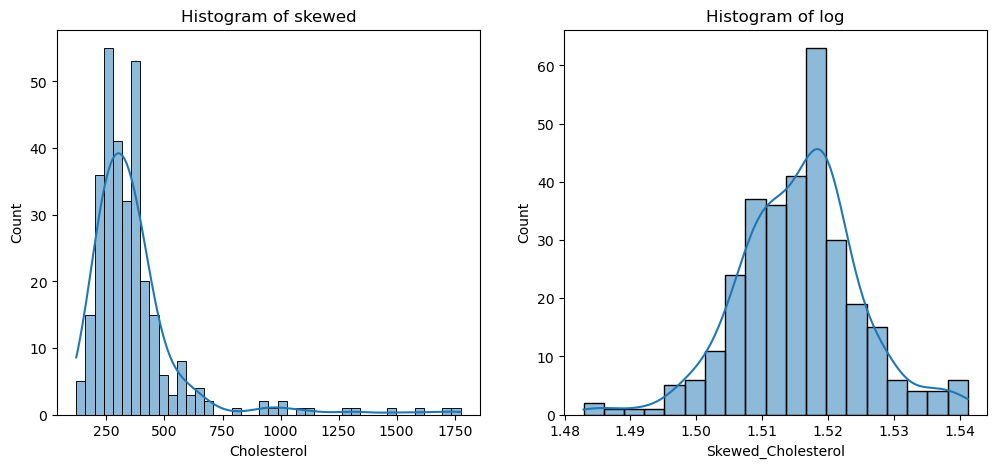

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Cholesterol'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of skewed')

df['Skewed_Cholesterol'],_ = boxcox(df['Cholesterol'] + 1)

sns.histplot(df['Skewed_Cholesterol'], kde=True, ax=axes[1])
axes[1].set_title('Histogram of log')

Text(0.5, 1.0, 'Histogram of log')

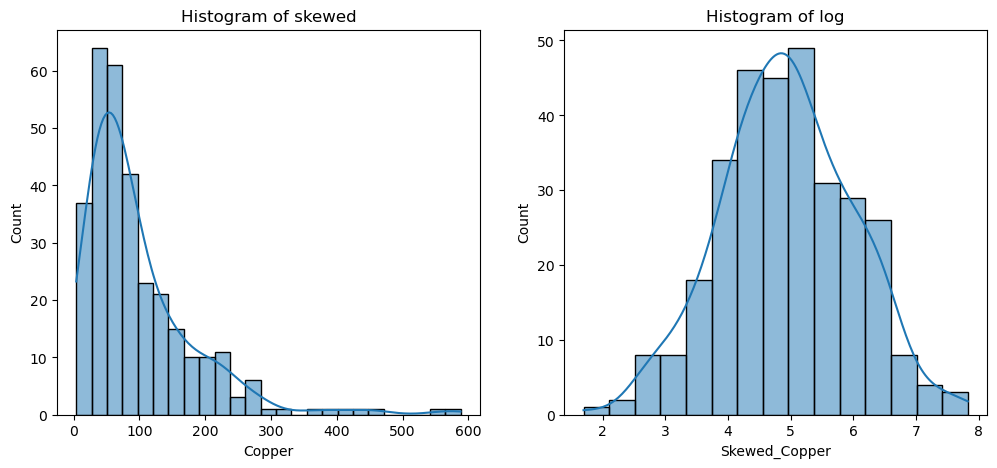

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Copper'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of skewed')

df['Skewed_Copper'],_ = boxcox(df['Copper'] + 1)

sns.histplot(df['Skewed_Copper'], kde=True, ax=axes[1])
axes[1].set_title('Histogram of log')

In [50]:
df.drop(skewed_features,inplace=True,axis=1)
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Albumin,Platelets,Stage,Skewed_Bilirubin,Skewed_Prothrombin,Skewed_Tryglicerides,Skewed_SGOT,Skewed_Alk_Phos,Skewed_Cholesterol,Skewed_Copper
0,400,2,0,59,0,1,1,1,2,2.60,190.0,4.0,1.075729,0.222375,3.187804,5.648019,2.234425,1.510677,5.939229
1,4500,0,0,56,0,0,1,1,0,4.14,221.0,3.0,0.552967,0.222373,2.939195,5.397424,2.278724,1.514532,4.549504
2,1012,2,0,70,1,0,0,0,1,3.48,151.0,4.0,0.620947,0.222375,2.744839,5.185622,2.170196,1.498285,6.347508
3,1925,2,0,55,0,0,1,1,1,2.54,183.0,4.0,0.690551,0.222373,2.956701,4.611709,2.274427,1.508772,4.764827
4,1504,1,1,38,0,0,1,1,0,3.53,136.0,3.0,0.849818,0.222374,2.858300,5.393252,2.187165,1.512483,5.821263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,0,0,61,0,0,1,0,0,3.58,288.0,2.0,0.293317,0.222373,3.035757,5.116774,2.197294,1.509008,3.562816
308,994,0,1,58,0,0,0,0,0,2.75,231.0,2.0,0.293317,0.222374,2.911077,4.788892,2.217211,1.510570,4.206598
309,939,0,0,62,0,0,0,0,0,3.35,234.0,2.0,0.674929,0.222373,2.989140,5.927586,2.234306,1.522692,4.145167
310,839,0,0,38,0,0,0,0,0,3.16,335.0,2.0,0.718915,0.222373,2.939195,5.436049,2.212045,1.509124,4.861065


In [52]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])
numerical_features.describe()

,N_Days,Age,Albumin,Platelets,Stage,Skewed_Bilirubin,Skewed_Prothrombin,Skewed_Tryglicerides,Skewed_SGOT,Skewed_Alk_Phos,Skewed_Cholesterol,Skewed_Copper
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,2006.362179,50.025641,3.520000,261.935065,3.032051,0.660918,0.222373,3.030393,5.376970,2.222350,1.515685,4.930109
std,1123.280843,10.583278,0.419892,94.991905,0.877880,0.237475,0.000001,0.159514,0.571171,0.029680,0.009191,1.048704
min,41.000000,26.000000,1.960000,62.000000,1.000000,0.235601,0.222370,2.513886,3.620218,2.125294,1.482879,1.692538
25%,1191.000000,42.000000,3.310000,200.000000,2.000000,0.464452,0.222372,2.934670,4.964409,2.202264,1.510111,4.228868
50%,1839.500000,50.000000,3.550000,258.500000,3.000000,0.610523,0.222373,3.039075,5.410644,2.220849,1.516116,4.933520
75%,2697.250000,57.000000,3.800000,322.000000,4.000000,0.851433,0.222374,3.128121,5.772969,2.240047,1.520602,5.618664
max,4556.000000,78.000000,4.640000,563.000000,4.000000,1.125129,0.222376,3.570931,7.253319,2.290751,1.541240,7.824922


In [53]:
scaler = MinMaxScaler()
df[['N_Days_scaled', 'Age_scaled']] = scaler.fit_transform(df[['N_Days', 'Age']])

<Axes: xlabel='N_Days_scaled', ylabel='Count'>

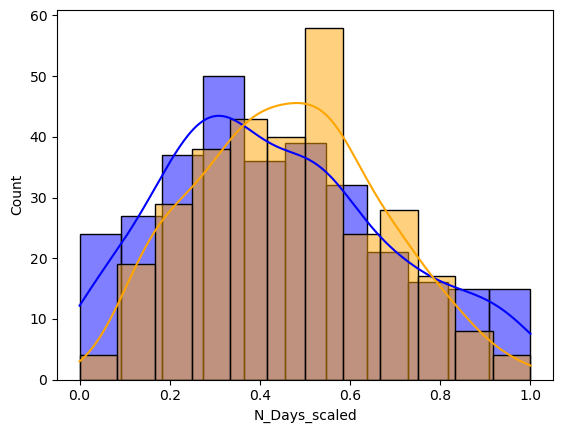

In [55]:
sns.histplot(df['N_Days_scaled'], kde=True, color='blue', label='Feature1', alpha=0.5)
sns.histplot(df['Age_scaled'], kde=True, color='orange', label='Feature2', alpha=0.5)

In [56]:
df_withou_status1 = df[df['Status'] != 1]

In [57]:
X = df_withou_status1.drop('Status',axis=1)
y = df_withou_status1['Status']

Accuracy (Decision Tree): 0.71
              precision    recall  f1-score   support

           0       0.85      0.63      0.72        35
           2       0.61      0.83      0.70        24

    accuracy                           0.71        59
   macro avg       0.73      0.73      0.71        59
weighted avg       0.75      0.71      0.71        59



<Axes: >

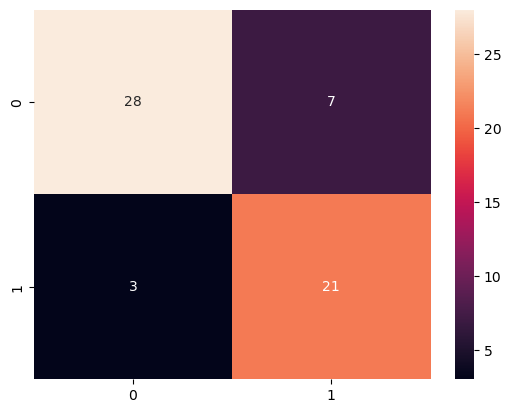

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=5, random_state=123)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy (Decision Tree): {accuracy_tree:.2f}')

print(classification_report(y_test, y_pred_tree))

cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

Accuracy (Random Forest): 0.83
              precision    recall  f1-score   support

           0       0.93      0.77      0.84        35
           2       0.73      0.92      0.81        24

    accuracy                           0.83        59
   macro avg       0.83      0.84      0.83        59
weighted avg       0.85      0.83      0.83        59



<Axes: >

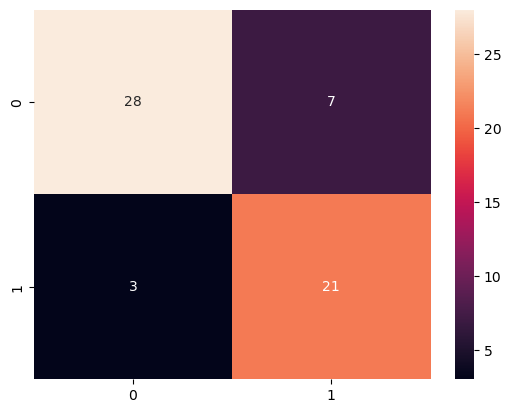

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_features=round(np.sqrt(M_features))-1
rf_model = RandomForestClassifier(max_features=max_features,n_estimators=100,criterion='gini',random_state=123)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy (Random Forest): {accuracy_rf:.2f}')

print(classification_report(y_test, y_pred_rf))

cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

Accuracy (SVM): 0.78
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        35
           2       1.00      0.46      0.63        24

    accuracy                           0.78        59
   macro avg       0.86      0.73      0.74        59
weighted avg       0.84      0.78      0.76        59



<Axes: >

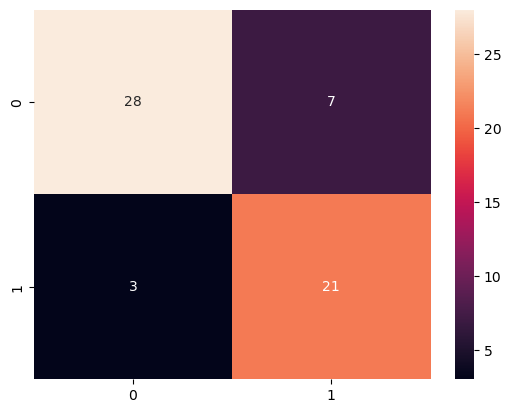

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='rbf',C=100)  
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy (SVM): {accuracy_svm:.2f}')

print(classification_report(y_test, y_pred_svm))

cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

Accuracy (KNN): 0.75
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           2       0.74      0.58      0.65        24

    accuracy                           0.75        59
   macro avg       0.74      0.72      0.73        59
weighted avg       0.74      0.75      0.74        59



<Axes: >

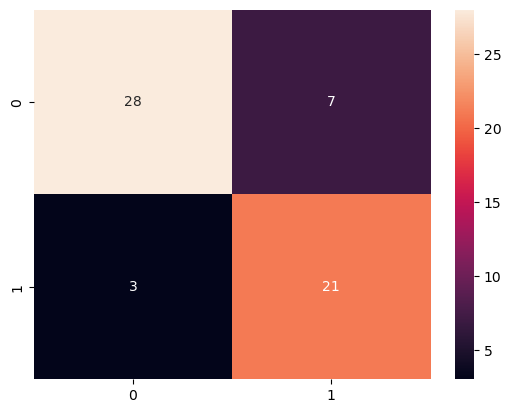

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=11, weights='distance')  
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy (KNN): {accuracy_knn:.2f}')

print('Classification Report (KNN):\n', classification_report(y_test, y_pred_knn))

cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        35
           2       0.69      0.75      0.72        24

    accuracy                           0.76        59
   macro avg       0.76      0.76      0.76        59
weighted avg       0.77      0.76      0.76        59



<Axes: >

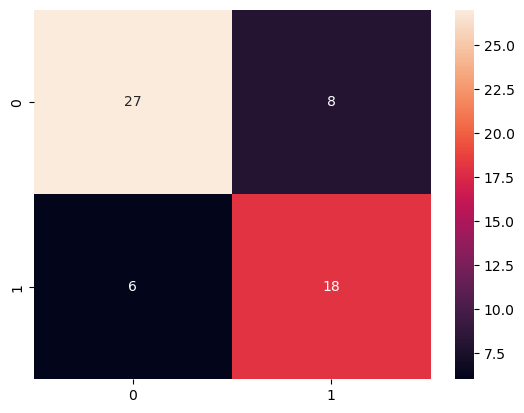

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression(random_state=12, penalty='l2', multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:\n', classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

              precision    recall  f1-score   support

           0       0.90      0.80      0.85        35
           2       0.75      0.88      0.81        24

    accuracy                           0.83        59
   macro avg       0.83      0.84      0.83        59
weighted avg       0.84      0.83      0.83        59



<Axes: >

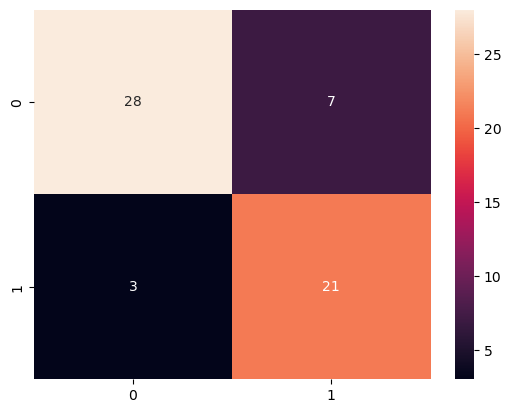

In [191]:
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = AdaBoostClassifier(n_estimators=200,random_state=0)    
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

In [66]:
Bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 4,random_state=2),n_estimators=30,random_state=0,bootstrap=True)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Bag.fit(X_train,y_train)
Bag.predict(X_test)

C:\Users\lenov\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


array([2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0])

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           2       0.73      0.79      0.76        24

    accuracy                           0.80        59
   macro avg       0.79      0.80      0.79        59
weighted avg       0.80      0.80      0.80        59



In [70]:
from sklearn.ensemble import StackingClassifier

In [72]:
estimators = [('SVM',SVC(random_state=42)),('KNN',KNeighborsClassifier()),('dt',DecisionTreeClassifier())]
estimators

[('SVM', SVC(random_state=42)),
 ('KNN', KNeighborsClassifier()),
 ('dt', DecisionTreeClassifier())]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = StackingClassifier( estimators=estimators, final_estimator= LogisticRegression())
clf.fit(X_train, y_train)
yhat=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           2       0.73      0.79      0.76        24

    accuracy                           0.80        59
   macro avg       0.79      0.80      0.79        59
weighted avg       0.80      0.80      0.80        59

